In [110]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import RFE
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [111]:
data = pd.read_csv('hotel_bookings.csv')
data2 = data.drop(labels=['company', 'reservation_status', 'reservation_status_date'], axis=1)
data2 = data2[data2['meal'] != "Undefined" ]
data2= data2[data2['distribution_channel'] != 'Undefined']
data2= data2[data2['distribution_channel'] != 'Undefined']
data2= data2[data2['agent'].notna()]


data_categorical_expanded = pd.get_dummies(data2)
y= data_categorical_expanded['is_canceled'] # y 
X=data_categorical_expanded.drop(labels=['is_canceled'], axis=1)


In [112]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,random_state=42)


In [113]:
# #Steps:
# #clean data
# remove outliers
# feature selection
# run knn Model 
# run model with PCA 
# viz resutls 

In [114]:
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,A,0,No Deposit,240.0,0,Transient,82.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0


In [115]:
data_categorical_expanded

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,9,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
8,1,85,2015,27,1,0,3,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119386,0,102,2017,35,31,2,5,3,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,34,2017,35,31,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,109,2017,35,31,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [116]:
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.7657992565055762


In [117]:
# # feature extraction
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_scaled = scaler.transform(X_train)
# model = LogisticRegression(solver='lbfgs', max_iter=1000)
# rfe = RFE(model,  n_features_to_select=5)
# fit = rfe.fit(X_scaled, y_train)
# print("Num Features: %d" % fit.n_features_)
# print("Selected Features: %s" % fit.support_)
# print("Feature Ranking: %s" % fit.ranking_)

In [118]:
#plt.plot(accuracies)

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

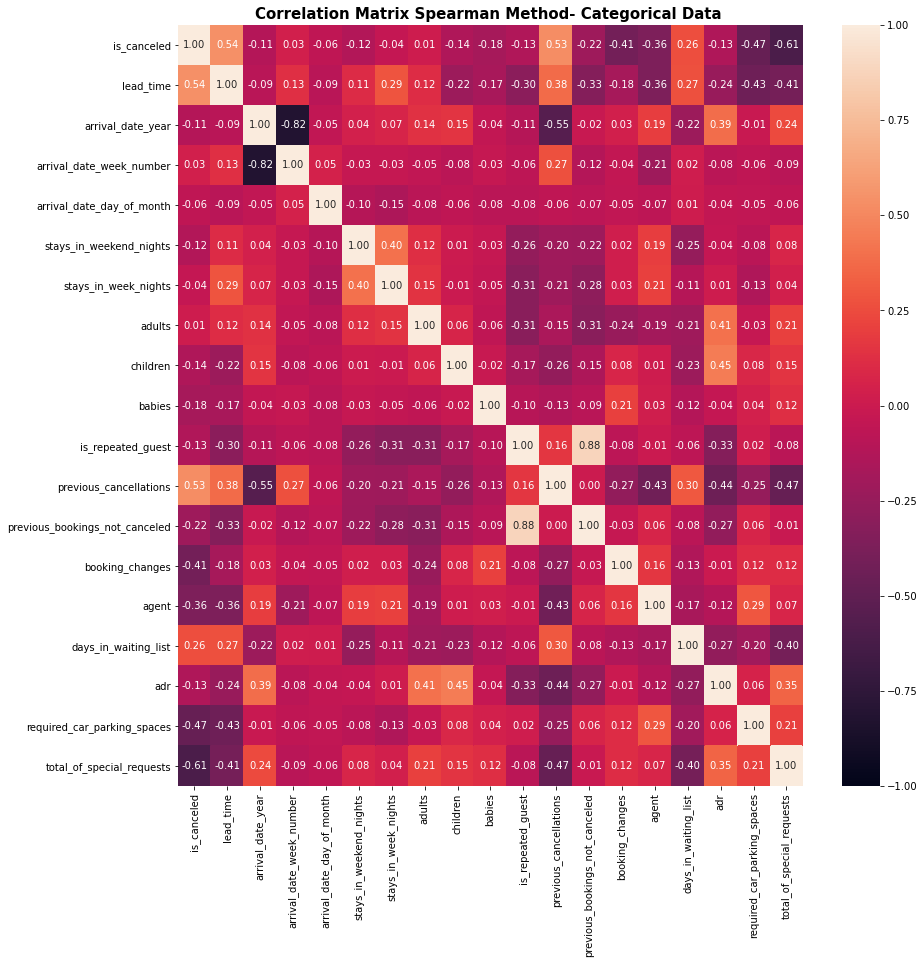

In [119]:
# Plot correlation matrix of features to see heat map of correlations to pick best features
plt.figure(figsize=(14,14))
df_corr = data2.corr(method='spearman')
heatmap = sns.heatmap(df_corr.corr(), fmt=".2f", vmin=-1, vmax=1, annot=True)
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

In [120]:
df_corr = data2.corr(method = 'spearman')["is_canceled"]
df_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.291497
previous_cancellations            0.290095
total_of_special_requests         0.286335
required_car_parking_spaces       0.189748
booking_changes                   0.171239
agent                             0.112290
days_in_waiting_list              0.102904
previous_bookings_not_canceled    0.076452
adults                            0.038286
babies                            0.033886
is_repeated_guest                 0.030812
stays_in_weekend_nights           0.027341
adr                               0.017852
stays_in_week_nights              0.014266
arrival_date_day_of_month         0.005935
arrival_date_week_number          0.005913
arrival_date_year                 0.004861
children                          0.002886
Name: is_canceled, dtype: float64

In [121]:
#selected top 7 features, with cut off of 0.1

selected_features = ['lead_time','previous_cancellations',        
'total_of_special_requests','required_car_parking_spaces','booking_changes','agent','days_in_waiting_list']
label = ["is_canceled"]
X = data2[selected_features]
y = data2[label]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

1 0.7652122872236353
2 0.78536489923694
3 0.7821854822930934
4 0.7897182547446684
5 0.7899628252788105
6 0.7937781256114264
7 0.7929465857953434
8 0.7959303463118763
9 0.7915280766973195
10 0.7949031500684798


Text(0, 0.5, 'Accuracy')

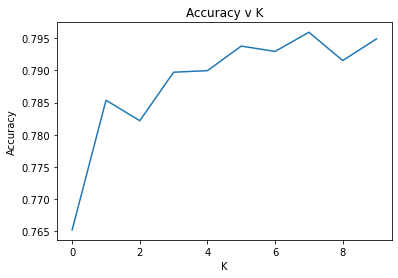

In [122]:
accuracies = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.values.ravel())
    y_pred_knn = knn.predict(X_test)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    print(i, acc_knn)
    accuracies.append(acc_knn)
plt.plot(accuracies)
plt.title("Accuracy v K")
plt.xlabel("K")
plt.ylabel("Accuracy")

In [123]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train.values.ravel())

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of KNN is : 0.7937781256114264
Confusion Matrix : n[[11135  1252]
 [ 2964  5093]]
Classification Report : n              precision    recall  f1-score   support

           0       0.79      0.90      0.84     12387
           1       0.80      0.63      0.71      8057

    accuracy                           0.79     20444
   macro avg       0.80      0.77      0.77     20444
weighted avg       0.79      0.79      0.79     20444



Accuracy Score of KNN is : 0.5360496967325377
Confusion Matrix : n[[8767 3620]
 [5865 2192]]
Classification Report : n              precision    recall  f1-score   support

           0       0.60      0.71      0.65     12387
           1       0.38      0.27      0.32      8057

    accuracy                           0.54     20444
   macro avg       0.49      0.49      0.48     20444
weighted avg       0.51      0.54      0.52     20444



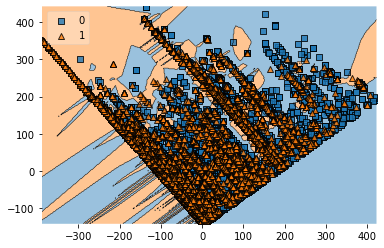

In [124]:
#convert to PCA 2 dimensions and plot
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train2, y_train.values.ravel())
X_test2 = pca.fit_transform(X_test)
y_pred_knn = knn.predict(X_test2)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")
# Plotting decision region
plot_decision_regions(X_train2, y_train.values.ravel(), clf=knn, legend=2)
plt.show()

In [125]:
# How to improve KNN?
# For better results, normalizing data on the same scale is highly recommended. 
# Generally, the normalization range considered between 0 and 1. 
# KNN is not suitable for the large dimensional data. 
# In such cases, dimension needs to reduce to improve the performance. 
# Also, handling missing values will help us in improving results.

In [126]:
#Selected features using select K best 
selected_features2 = ['deposit_type_No Deposit',
 'deposit_type_Non Refund',
 'agent',
 'adr',
 'lead_time',
 'country_PRT',
 'previous_cancellations',
 'total_of_special_requests',
 'required_car_parking_spaces',
 'market_segment_Groups',
 'assigned_room_type_A',
 'booking_changes',
 'customer_type_Transient',
 'days_in_waiting_list',
 'distribution_channel_TA/TO']

X = data_categorical_expanded[selected_features2]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [127]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train.values.ravel())

y_pred_knn = knn.predict(X_test)
y_score = knn.predict_proba(X_test)[:, 1]

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of KNN is : 0.7798376051653296
Confusion Matrix : n[[11045  1342]
 [ 3159  4898]]
Classification Report : n              precision    recall  f1-score   support

           0       0.78      0.89      0.83     12387
           1       0.78      0.61      0.69      8057

    accuracy                           0.78     20444
   macro avg       0.78      0.75      0.76     20444
weighted avg       0.78      0.78      0.77     20444



In [128]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.colors import ListedColormap
# from sklearn import neighbors, datasets
# from sklearn.inspection import DecisionBoundaryDisplay

# n_neighbors = 6

# # Create color maps
# cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
# cmap_bold = ["darkorange", "c", "darkblue"]

# for weights in ["uniform", "distance"]:
#     # we create an instance of Neighbours Classifier and fit the data.
#     clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
#     clf.fit(X, y)

#     _, ax = plt.subplots()
#     DecisionBoundaryDisplay.from_estimator(
#         clf,
#         X,
#         cmap=cmap_light,
#         ax=ax,
#         response_method="predict",
#         plot_method="pcolormesh",

#         shading="auto",
#     )

#     # Plot also the training points
#     sns.scatterplot(
#         x=X[:, 0],
#         y=X[:, 1],
#         palette=cmap_bold,
#         alpha=1.0,
#         edgecolor="black",
#     )
#     plt.title(
#         "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
#     )

# plt.show()

In [129]:
# import nltk
# import sklearn

# print('The nltk version is {}.'.format(nltk.__version__))
# print('The scikit-learn version is {}.'.format(sklearn.__version__))

# # The nltk version is 3.0.0.
# # The scikit-learn version is 0.15.2.

The nltk version is 3.5.
The scikit-learn version is 1.0.2.


In [ ]:
#implement CV 